In [1]:
import pandas as pd

df = pd.read_csv(
    "/content/sample_data/household_power_consumption.txt",
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values=['?', 'NA', ''],
    low_memory=False
)

df.set_index('datetime', inplace=True)


/tmp/ipython-input-871020990.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-871020990.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipython-input-871020990.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


In [2]:
df = df.apply(pd.to_numeric, errors='coerce')


In [3]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [4]:
df.isna().sum()


,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [5]:
df_res = df.resample('H').mean()
df_res.isna().sum()


/tmp/ipython-input-3984273327.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_res = df.resample('H').mean()


,0
Global_active_power,421
Global_reactive_power,421
Voltage,421
Global_intensity,421
Sub_metering_1,421
Sub_metering_2,421
Sub_metering_3,421


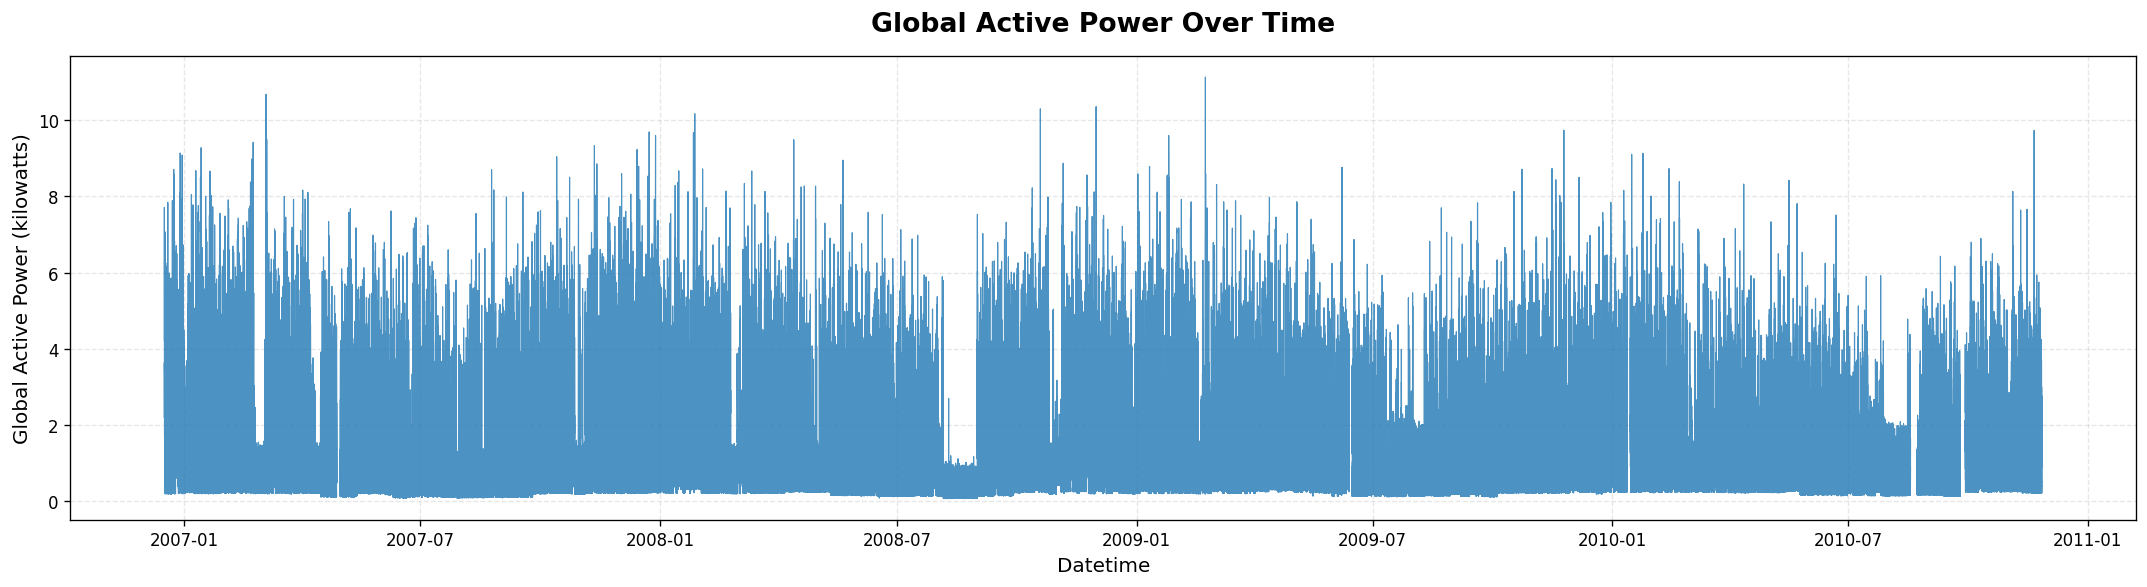

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5), dpi=120)

plt.plot(df.index, df['Global_active_power'],
         linewidth=0.7,
         alpha=0.8,
         color='#1f77b4')

plt.title('Global Active Power Over Time',
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

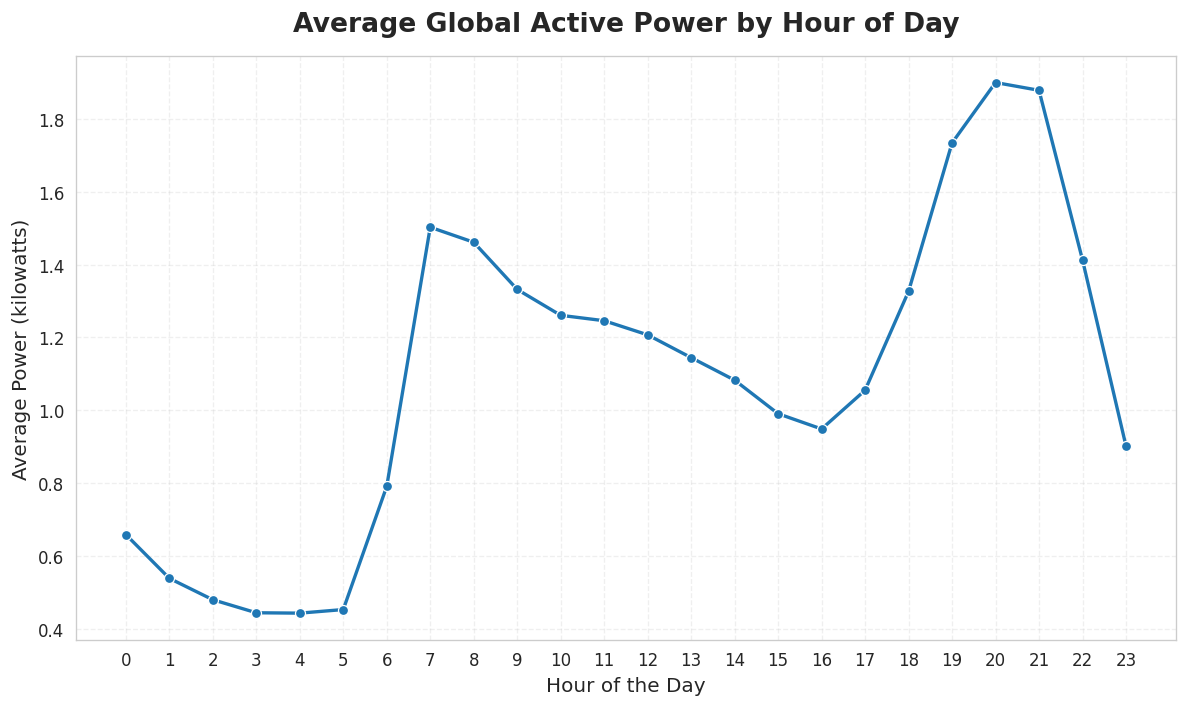

In [10]:
import seaborn as sns
sns.set_style("whitegrid")

hourly_avg = df.groupby(df.index.hour)['Global_active_power'].mean()

plt.figure(figsize=(10,6), dpi=120)

sns.lineplot(x=hourly_avg.index, y=hourly_avg.values,
             linewidth=2, marker='o', markersize=6)

plt.title("Average Global Active Power by Hour of Day",
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Power (kilowatts)", fontsize=12)

plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

